In [2]:
%run 'data_preparation.ipynb'

In [3]:
from keras.models import Sequential
from keras.layers import Dense, LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from keras.utils import plot_model
import tensorflow as tf
from tensorflow import set_random_seed

/home/jawahar/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:34: FutureWarning:

Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.

Using TensorFlow backend.


#  Supervised Learning

In [23]:
# set seed
np.random.seed(7)

# prepare the data set
per_day = year.pivot_table(index=['BOOKING_DATE'],values=['BOOKING_HAL_ID'], aggfunc=lambda x: len(x.unique()))
#per_day.reset_index(inplace=True)

data = per_day.values

# using keras often requires the data type float32
data = data.astype('float32')

In [24]:
# slice the data
train = data[:950]
test = data[950:]

In [25]:
def prepare_data(data, lags=1):
    """
    Create lagged data from an input time series
    """
    X, y = [], []
    for row in range(len(data) - lags - 1):
        a = data[row:(row + lags), 0]
        X.append(a)
        b = data[row + lags, 0]
        y.append(b)
    return np.array(X), np.array(y)

# Multilayer perceptron with window

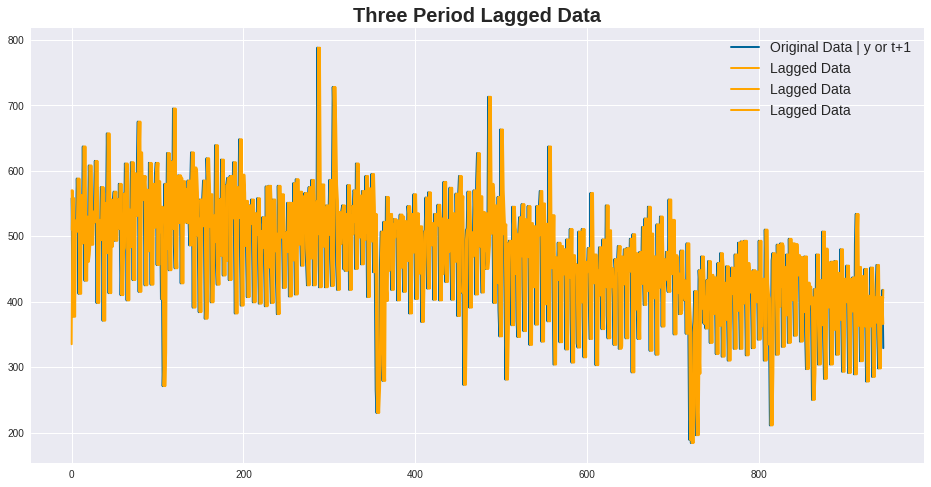

In [26]:
# reshape and lag shift the dataset
lags = 3
X_train, y_train = prepare_data(train, lags)
X_test, y_test = prepare_data(test, lags)

# plot the created data
plt.plot(y_train, label='Original Data | y or t+1', color='#006699')
plt.plot(X_train, label='Lagged Data', color='orange')
plt.legend(loc='best')
plt.title('Three Period Lagged Data')
#plt.savefig('./img/ann3_training.png')
plt.show()


In [29]:
# create and fit Multilayer Perceptron model
mdl = Sequential()
mdl.add(Dense(4, input_dim=lags, activation='relu'))
#mdl.add(Dropout(0.1))
mdl.add(Dense(12, activation='relu'))
#mdl.add(Dropout(0.1))
mdl.add(Dense(1))
mdl.compile(loss='mean_squared_error', optimizer='adam')
mdl.fit(X_train, y_train, epochs=400, batch_size=2, verbose=2, validation_data=(X_test, y_test))

Train on 946 samples, validate on 142 samples
Epoch 1/400
 - 1s - loss: 337238.9311 - val_loss: 8287.4864
Epoch 2/400
 - 0s - loss: 6376.2844 - val_loss: 2772.8780
Epoch 3/400
 - 0s - loss: 5345.3138 - val_loss: 2694.0328
Epoch 4/400
 - 0s - loss: 5268.1829 - val_loss: 2676.4200
Epoch 5/400
 - 0s - loss: 5186.5286 - val_loss: 2730.0973
Epoch 6/400
 - 0s - loss: 5186.4499 - val_loss: 2651.6448
Epoch 7/400
 - 0s - loss: 5181.4158 - val_loss: 2617.3065
Epoch 8/400
 - 0s - loss: 5134.6808 - val_loss: 2725.2291
Epoch 9/400
 - 0s - loss: 5204.1842 - val_loss: 2612.7331
Epoch 10/400
 - 0s - loss: 5135.3463 - val_loss: 2613.0566
Epoch 11/400
 - 0s - loss: 5159.1913 - val_loss: 2623.6454
Epoch 12/400
 - 0s - loss: 5128.6959 - val_loss: 2670.3997
Epoch 13/400
 - 0s - loss: 5218.6642 - val_loss: 2612.7969
Epoch 14/400
 - 0s - loss: 5163.0824 - val_loss: 2617.8305
Epoch 15/400
 - 0s - loss: 5133.7469 - val_loss: 2607.0824
Epoch 16/400
 - 0s - loss: 5192.5422 - val_loss: 2611.0308
Epoch 17/400
 - 0

Epoch 139/400
 - 0s - loss: 4417.9609 - val_loss: 2215.9787
Epoch 140/400
 - 0s - loss: 4407.3124 - val_loss: 2152.1408
Epoch 141/400
 - 0s - loss: 4429.8755 - val_loss: 2299.2923
Epoch 142/400
 - 0s - loss: 4422.4285 - val_loss: 2258.0876
Epoch 143/400
 - 0s - loss: 4433.4747 - val_loss: 2220.5139
Epoch 144/400
 - 0s - loss: 4483.3349 - val_loss: 2305.1827
Epoch 145/400
 - 0s - loss: 4414.8397 - val_loss: 2320.2197
Epoch 146/400
 - 0s - loss: 4433.5740 - val_loss: 2163.8385
Epoch 147/400
 - 0s - loss: 4463.9969 - val_loss: 2334.8765
Epoch 148/400
 - 0s - loss: 4470.9009 - val_loss: 2304.6984
Epoch 149/400
 - 0s - loss: 4502.6998 - val_loss: 2239.9435
Epoch 150/400
 - 0s - loss: 4380.9935 - val_loss: 2203.4974
Epoch 151/400
 - 0s - loss: 4432.2895 - val_loss: 2300.6172
Epoch 152/400
 - 0s - loss: 4374.1058 - val_loss: 2449.2627
Epoch 153/400
 - 0s - loss: 4426.4049 - val_loss: 2209.3922
Epoch 154/400
 - 0s - loss: 4441.6745 - val_loss: 2368.2285
Epoch 155/400
 - 0s - loss: 4435.0775 - 

Epoch 276/400
 - 0s - loss: 4370.4461 - val_loss: 2247.7373
Epoch 277/400
 - 0s - loss: 4381.3403 - val_loss: 2246.2799
Epoch 278/400
 - 0s - loss: 4389.3011 - val_loss: 2120.9240
Epoch 279/400
 - 0s - loss: 4419.7860 - val_loss: 2116.9560
Epoch 280/400
 - 0s - loss: 4404.9071 - val_loss: 2303.5892
Epoch 281/400
 - 0s - loss: 4403.4103 - val_loss: 2191.7922
Epoch 282/400
 - 0s - loss: 4355.2225 - val_loss: 2129.3438
Epoch 283/400
 - 0s - loss: 4324.3370 - val_loss: 2254.0014
Epoch 284/400
 - 0s - loss: 4378.5348 - val_loss: 2268.6874
Epoch 285/400
 - 0s - loss: 4349.3791 - val_loss: 2303.9500
Epoch 286/400
 - 0s - loss: 4336.5153 - val_loss: 2154.8768
Epoch 287/400
 - 0s - loss: 4371.2625 - val_loss: 2311.5771
Epoch 288/400
 - 0s - loss: 4362.5719 - val_loss: 2137.2861
Epoch 289/400
 - 0s - loss: 4398.4831 - val_loss: 2176.3003
Epoch 290/400
 - 0s - loss: 4363.3431 - val_loss: 2382.7172
Epoch 291/400
 - 0s - loss: 4452.5951 - val_loss: 2201.4569
Epoch 292/400
 - 0s - loss: 4387.8348 - 

In [30]:
# Estimate model performance
train_score = mdl.evaluate(X_train, y_train, verbose=0)
print('Train Score: {:.2f} MSE ({:.2f} RMSE)'.format(train_score, math.sqrt(train_score)))
test_score = mdl.evaluate(X_test, y_test, verbose=0)
print('Test Score: {:.2f} MSE ({:.2f} RMSE)'.format(test_score, math.sqrt(test_score)))

Train Score: 4309.63 MSE (65.65 RMSE)
Test Score: 2336.62 MSE (48.34 RMSE)


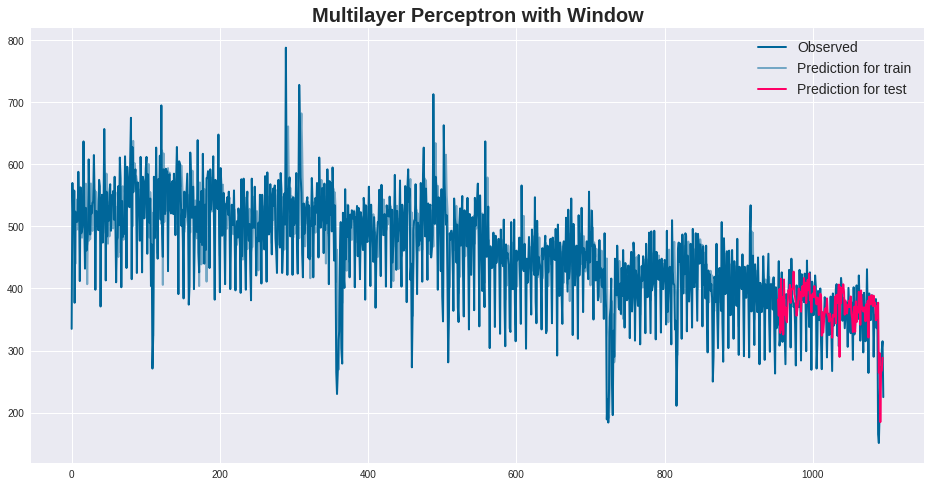

In [31]:
# generate predictions for training
train_predict = mdl.predict(X_train)
test_predict = mdl.predict(X_test)
#print(train_predict)
# shift train predictions for plotting
train_predict_plot = np.empty_like(data)
train_predict_plot[:, :] = np.nan
train_predict_plot[lags: len(train_predict) + lags, :] = train_predict

# shift test predictions for plotting
test_predict_plot = np.empty_like(data)
test_predict_plot[:, :] = np.nan
test_predict_plot[len(train_predict)+(lags * 2)+1:len(data)-1, :] = test_predict

# plot observation and predictions
plt.plot(data, label='Observed', color='#006699');
plt.plot(train_predict_plot, label='Prediction for train', color='#006699', alpha=0.5);
plt.plot(test_predict_plot, label='Prediction for test', color='#ff0066');
plt.legend(loc='best')
plt.title('Multilayer Perceptron with Window')
plt.show()

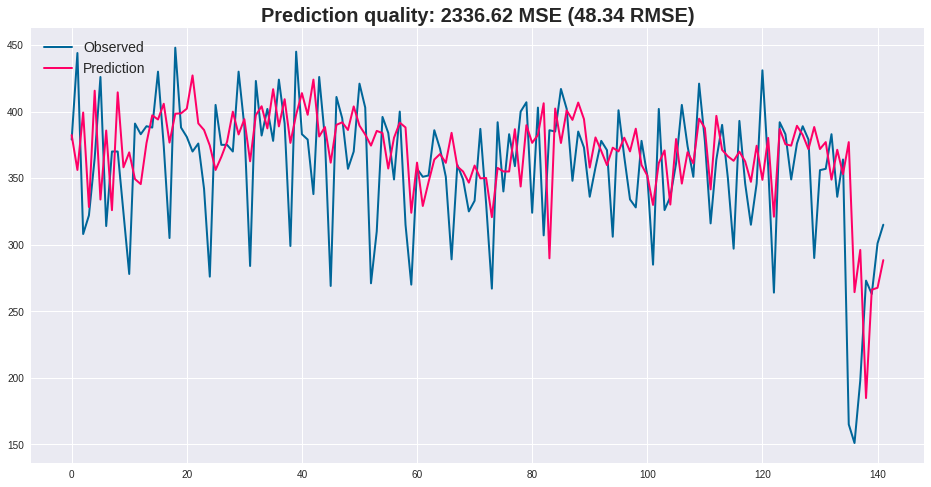

In [32]:
mse = ((y_test.reshape(-1, 1) - test_predict.reshape(-1, 1)) ** 2).mean()
plt.title('Prediction quality: {:.2f} MSE ({:.2f} RMSE)'.format(mse, math.sqrt(mse)))
plt.plot(y_test.reshape(-1, 1), label='Observed', color='#006699')
plt.plot(test_predict.reshape(-1, 1), label='Prediction', color='#ff0066')
plt.legend(loc='upper left');
plt.show()

# LSTM Recurrent Neural Network

In [33]:
# fix random seed for reproducibility
np.random.seed(1)

# normalize the dataset
scaler = MinMaxScaler(feature_range=(0, 1))
dataset = scaler.fit_transform(data)

# split into train and test sets
train = dataset[0:950, :]
test = dataset[950:, :]

# reshape into X=t and Y=t+1
lags = 3
X_train, y_train = prepare_data(train, lags)
X_test, y_test = prepare_data(test, lags)

# reshape input to be [samples, time steps, features]
X_train = np.reshape(X_train, (X_train.shape[0], 1, X_train.shape[1]))
X_test = np.reshape(X_test, (X_test.shape[0], 1, X_test.shape[1]))

In [34]:
# create and fit the LSTM network
mdl = Sequential()
mdl.add(Dense(3, input_shape=(1, lags), activation='relu'))
mdl.add(LSTM(7, activation='softsign'))
mdl.add(Dense(1, activation='relu'))
mdl.compile(loss='mean_squared_error', optimizer='adam')
mdl.fit(X_train, y_train, epochs=100, batch_size=1, verbose=2)

Epoch 1/100
 - 2s - loss: 0.0254
Epoch 2/100
 - 1s - loss: 0.0139
Epoch 3/100
 - 2s - loss: 0.0132
Epoch 4/100
 - 2s - loss: 0.0127
Epoch 5/100
 - 1s - loss: 0.0121
Epoch 6/100
 - 1s - loss: 0.0120
Epoch 7/100
 - 1s - loss: 0.0120
Epoch 8/100
 - 1s - loss: 0.0118
Epoch 9/100
 - 1s - loss: 0.0118
Epoch 10/100
 - 1s - loss: 0.0118
Epoch 11/100
 - 1s - loss: 0.0118
Epoch 12/100
 - 1s - loss: 0.0118
Epoch 13/100
 - 1s - loss: 0.0119
Epoch 14/100
 - 1s - loss: 0.0117
Epoch 15/100
 - 1s - loss: 0.0118
Epoch 16/100
 - 1s - loss: 0.0118
Epoch 17/100
 - 1s - loss: 0.0117
Epoch 18/100
 - 1s - loss: 0.0117
Epoch 19/100
 - 1s - loss: 0.0118
Epoch 20/100
 - 1s - loss: 0.0120
Epoch 21/100
 - 1s - loss: 0.0117
Epoch 22/100
 - 1s - loss: 0.0118
Epoch 23/100
 - 1s - loss: 0.0117
Epoch 24/100
 - 1s - loss: 0.0118
Epoch 25/100
 - 1s - loss: 0.0118
Epoch 26/100
 - 1s - loss: 0.0117
Epoch 27/100
 - 1s - loss: 0.0119
Epoch 28/100
 - 1s - loss: 0.0116
Epoch 29/100
 - 2s - loss: 0.0117
Epoch 30/100
 - 1s - lo

In [35]:
# make predictions
train_predict = mdl.predict(X_train)
test_predict = mdl.predict(X_test)

# invert transformation
train_predict = scaler.inverse_transform(train_predict)
y_train = scaler.inverse_transform([y_train])
test_predict = scaler.inverse_transform(test_predict)
y_test = scaler.inverse_transform([y_test])

In [36]:
# calculate root mean squared error
train_score = math.sqrt(mean_squared_error(y_train[0], train_predict[:,0]))
print('Train Score: {:.2f} RMSE'.format(train_score))
test_score = math.sqrt(mean_squared_error(y_test[0], test_predict[:,0]))
print('Test Score: {:.2f} RMSE'.format(test_score))

Train Score: 67.02 RMSE
Test Score: 56.10 RMSE


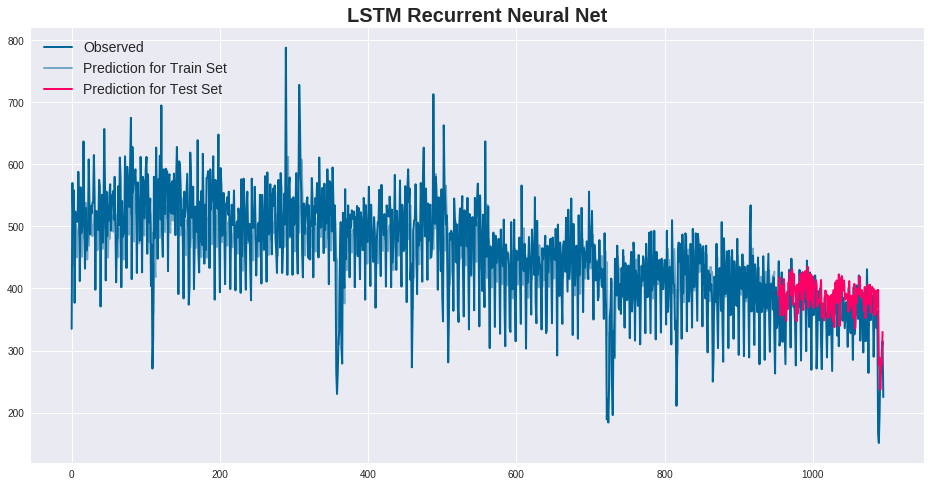

In [37]:
# shift train predictions for plotting
train_predict_plot = np.empty_like(data)
train_predict_plot[:, :] = np.nan
train_predict_plot[lags:len(train_predict)+lags, :] = train_predict

# shift test predictions for plotting
test_predict_plot = np.empty_like(data)
test_predict_plot[:, :] = np.nan
test_predict_plot[len(train_predict) + (lags * 2)+1:len(data)-1, :] = test_predict

# plot observation and predictions
plt.plot(data, label='Observed', color='#006699');
plt.plot(train_predict_plot, label='Prediction for Train Set', color='#006699', alpha=0.5);
plt.plot(test_predict_plot, label='Prediction for Test Set', color='#ff0066');
plt.legend(loc='upper left')
plt.title('LSTM Recurrent Neural Net')
plt.show()

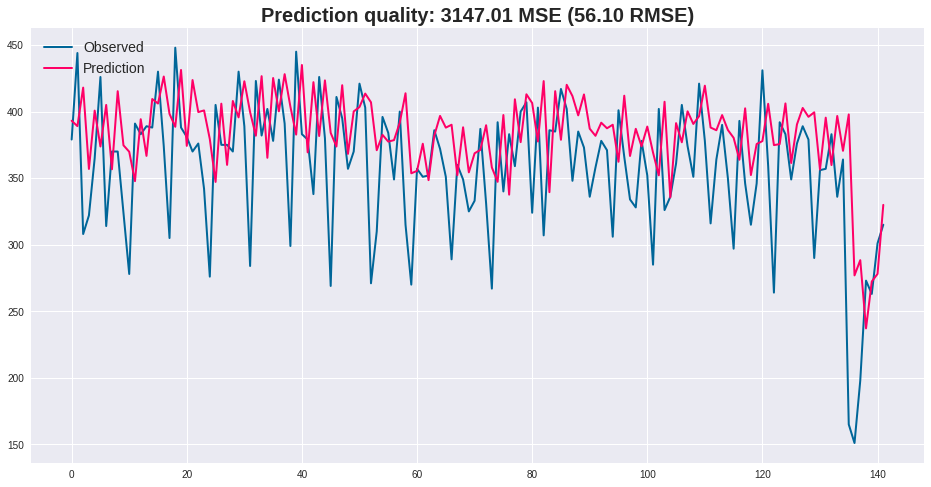

In [38]:
mse = ((y_test.reshape(-1, 1) - test_predict.reshape(-1, 1)) ** 2).mean()
plt.title('Prediction quality: {:.2f} MSE ({:.2f} RMSE)'.format(mse, math.sqrt(mse)))
plt.plot(y_test.reshape(-1, 1), label='Observed', color='#006699')
plt.plot(test_predict.reshape(-1, 1), label='Prediction', color='#ff0066')
plt.legend(loc='upper left');
plt.show()

# Observations

# RMSE values for each model

#  Train/Test(60/40)

Multilayer perceptron with window

Train Score: 4912.00 MSE (70.09 RMSE)

Test Score: 3156.05 MSE (56.18 RMSE)

LSTM Recurrent Neural Network

Train Score: 68.37 RMSE

Test Score: 104.67 RMSE

# Train/Test(80/20)

Multilayer perceptron with window

Train Score: 5025.14 MSE (70.89 RMSE)

Test Score: 3063.79 MSE (55.35 RMSE)

LSTM Recurrent Neural Network

Train Score: 68.65 RMSE

Test Score: 61.11 RMSE

# Train/Test(90/10)

Multilayer perceptron with window

Train Score: 4309.63 MSE (65.65 RMSE)

Test Score: 2336.62 MSE (48.34 RMSE)

LSTM Recurrent Neural Network, epochs=100

Train Score: 67.02 RMSE

Test Score: 56.10 RMSE

LSTM Recurrent Neural Network, epochs=200

Train Score: 67.20 RMSE

Test Score: 60.13 RMSE